# CHAPTER 04. 분류


## 01. 분류(Classification)의 개요



## 02. 결정 트리
- 데이터 균일도가 높게끔 데이터를 분리함.



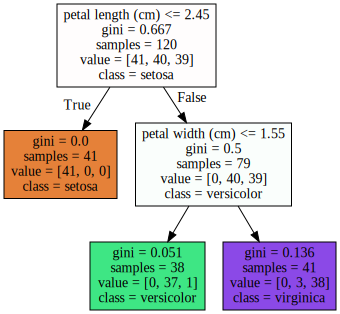

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=2)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)
dt_clf.fit(X_train, y_train)


from sklearn.tree import export_graphviz
import graphviz


export_graphviz(dt_clf, out_file="dot/tree.dot", class_names= iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

with open("dot/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 하이퍼 파라미터 디폴트로 하면 지니계수 0 될 때까지 리프노드 나눔


<AxesSubplot:>

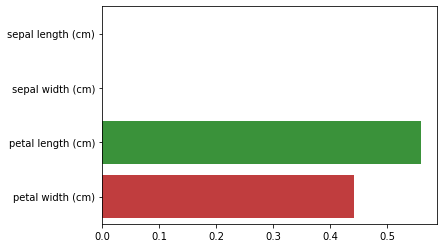

In [2]:
import seaborn as sns
import numpy as np
%matplotlib inline

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정 트리 과적합


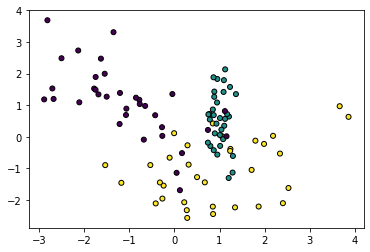

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X_features, y_lables = make_classification(n_features=2, n_redundant=0, n_informative=2,n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker= "o", c = y_lables, s= 25, edgecolors="k")

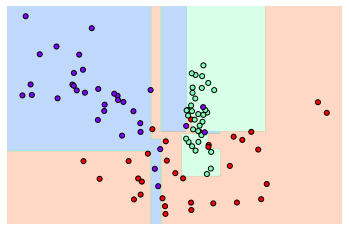

In [4]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

dt_clf = DecisionTreeClassifier().fit(X_features, y_lables)
visualize_boundary(dt_clf, X_features, y_lables)

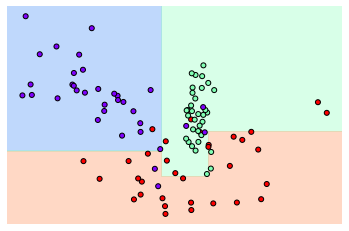

In [5]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_lables)
visualize_boundary(dt_clf, X_features, y_lables)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

feature_name_df = pd.read_csv("data/features.txt", sep="\s+", header= None, names=["column_index", "column_name"])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [7]:
feature_dup_df = feature_name_df.groupby("column_name").count()


feature_dup_df[feature_dup_df["column_index"] > 1].count()

feature_name_df.groupby("column_name").cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [8]:
def get_new_feature_name(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(), columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x: x[0] + "_" + str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis = 1)
    return new_feature_name_df
    
def get_human_dataset():
    feature_name_df = pd.read_csv("./data/features.txt", sep="\s+", header=None, names=["column_index", "column_name"])
    new_feature_name_df = get_new_feature_name(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv("./data/train/X_train.txt", sep="\s+", names = feature_name)
    X_test = pd.read_csv("./data/test/X_test.txt", sep="\s+", names = feature_name)
    y_train = pd.read_csv("./data/train/y_train.txt", sep="s+", header= None, names= ["action"])
    y_test = pd.read_csv("./data/test/y_test.txt", sep="s+", header= None, names= ["action"])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [9]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, pred))
print(dt_clf.get_params())

accuracy: 0.8547675602307431
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [6,8,10,12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf,param_grid = params, scoring = "accuracy", cv = 5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.5min finished
0.8513444970102249
{'max_depth': 16}


In [12]:
# print(grid_cv.cv_results_)
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[["param_max_depth", "mean_test_score"]]



,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [13]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    print(f"depth = {depth}, accuracy = {accuracy_score(y_test, pred)}")

depth = 6, accuracy = 0.8557855446216491
depth = 8, accuracy = 0.8707159823549372
depth = 10, accuracy = 0.8673227010519172
depth = 12, accuracy = 0.8646080760095012
depth = 16, accuracy = 0.8574821852731591
depth = 20, accuracy = 0.8547675602307431
depth = 24, accuracy = 0.8547675602307431


In [14]:

params = {
    "max_depth" : [8, 12, 16, 20],
    "min_samples_split": [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring="accuracy", cv=5, verbose =1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [15]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f"accuracy: {accuracy}")


accuracy: 0.8717339667458432


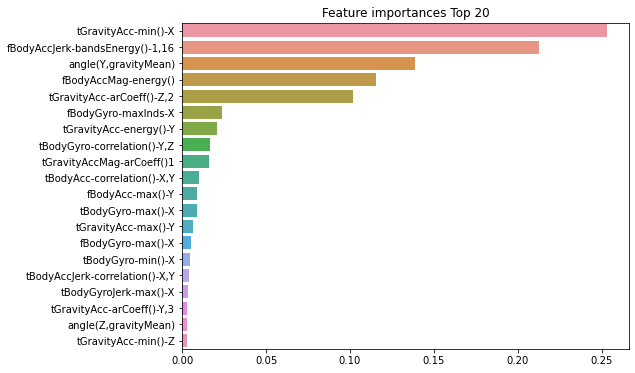

In [16]:
ftr_importances_values = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x= ftr_top20, y = ftr_top20.index)
plt.show()

## 03. 앙상블 학습

- 여러개 분류기 사용
- 보팅
    - 여러 종류 분류기 한 데이터 셋 학습
    - 하드 보팅: 다수결
    - 소프트 보팅: 확률 합 큰 거
- 배깅
    - 한 종류 분류기 각각 다른 데이터 셋 학습
- 부스팅
    - 전 분류기가 예측 틀리게 한 데이터에 대해 다음 분류기에서 잘 예측하도록 가중치 부여


### 보팅 분류기(Voting Classifier)



In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [19]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators = [("LR", lr_clf), ("KNN", knn_clf)], voting = "soft")
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, pred)}")

accuracy: 0.9473684210526315


## 04. 랜덤 포레스트

- 배깅의 대표 알고리즘
- 비교적 빠름
- 기반 알고리즘은 결정 트리
- 부트스트래핑된 데이터를 각각의 분류기가 각자 학습후 보팅


In [21]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, pred)}")


accuracy: 0.9253478113335596


In [22]:
params = {
    "n_estimators": [100],
    "max_depth": [6, 8, 10, 12],
    "min_samples_leaf": [8, 12, 18],
    "min_samples_split": [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print(f"best param: {grid_cv.best_params_}")
print(f"best score: {grid_cv.best_score_}")


best param: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
best score: 0.9179815016322089


In [23]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, pred)}")


accuracy: 0.9165252799457075


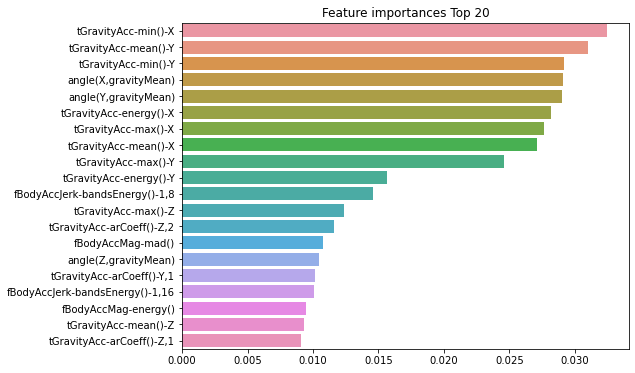

In [24]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title("Feature importances Top 20")
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()
